In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('creditcard-fraud.csv')

In [3]:
dataset = df.values

In [5]:
X = dataset[:,1:10]

In [6]:
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(9,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
68/68 [==============================] - 1s 8ms/step - loss: 0.6210 - accuracy: 0.8411 - val_loss: 0.5497 - val_accuracy: 0.8633
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8494 - val_loss: 0.4660 - val_accuracy: 0.8633
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8494 - val_loss: 0.4111 - val_accuracy: 0.8633
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8494 - val_loss: 0.3723 - val_accuracy: 0.8633
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8494 - val_loss: 0.3410 - val_accuracy: 0.8633
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8494 - val_loss: 0.3141 - val_accuracy: 0.8633
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8513 - val_loss: 0.2899 - val_accuracy: 0.8720
Epoch 8/100
6

Epoch 59/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9610 - val_loss: 0.0877 - val_accuracy: 0.9610
Epoch 60/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9624 - val_loss: 0.0867 - val_accuracy: 0.9631
Epoch 61/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9624 - val_loss: 0.0858 - val_accuracy: 0.9631
Epoch 62/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9628 - val_loss: 0.0849 - val_accuracy: 0.9631
Epoch 63/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9624 - val_loss: 0.0841 - val_accuracy: 0.9631
Epoch 64/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9633 - val_loss: 0.0834 - val_accuracy: 0.9631
Epoch 65/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9633 - val_loss: 0.0826 - val_accuracy: 0.9631
Epoch 

In [20]:
model.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9719


0.9718614816665649

In [21]:
import matplotlib.pyplot as plt

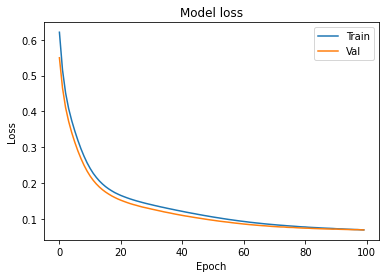

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

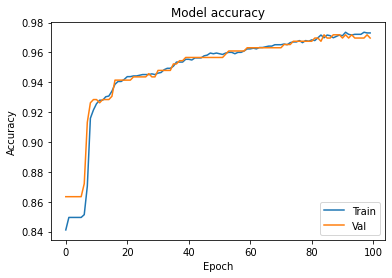

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()